# Espacios de fases de la ecuación con difusión



In [91]:
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
import numpy as np

In [92]:
u1 = Symbol('u1')
u2 = Symbol('u2')

In [93]:
# TABLE II paper diffusion 

r1 = 0.0001 # en este caso, ambas poblaciones tienen una interacción
r2 = 0.6 # positiva con el entorno, aunque los depredadores son casi autónomos
b11 = 0.0019 # las presas son cooperativas entre sí
b12 = -0.00075 # la población 1 corresponde a las presas
b21 = 0.00091 # la población 2 a los depredadores
b22 = -0.0019 # los depredadores son competitivos entre sí
a1 = 0.0005
a2 = 0.000625
c1 = 0.001251
c2 = 0.001
s = r2/r1 # estos son los parámetros del sistema adimensionalizado, s es la proporción de rs
q1 = a1/(c1*r1) # los qs son las proporciones entre as y cs
q2 = a2/(c2*r1) # ambos tienen a r1 de denominador, por la factorización que se hizo para s
p11 = b11/(c1*r1) # los ps equivalen a los bs
p12 = b12/(c2*r1) # de modo que incorporan tanto la interacción
p21 = b21/(c1*r1) # como el límite de las cs
p22 = b22/(c2*r1) # y tienen el factor de r1 en el denominador, por la factorización de s
g = 1 # es el gamma que propone Murray
d = 19 # estoy escogiendo un valor de difusión mayor a la d crítica, que es 18.algo

In [94]:
# Functionals. In the first step, we define the functionals.

f1 = g*u1*(1-q1*u1+(p11*u1+p12*u2)*(1-u1))
f2 = g*u2*(s-q2*u2+(p21*u1+p22*u2)*(1-u2))

In [95]:
# Calculate the solutions and print them
solucion = solve([f1,f2],[u1,u2])
print(solucion)

[(-8.93463091074237e-5, 0.0), (0.0, 0.0), (0.0, 0.309881237415477), (0.0, 1.01906613100558), (0.424693552787801, 0.466861893539141), (0.441900679728548, 0.473154874821710), (0.736931451572265, 0.0), (0.619932130000084 - 0.348403740313958*I, 1.02658982019912 - 0.00728446411237864*I), (0.619932130000084 + 0.348403740313958*I, 1.02658982019912 + 0.00728446411237864*I)]


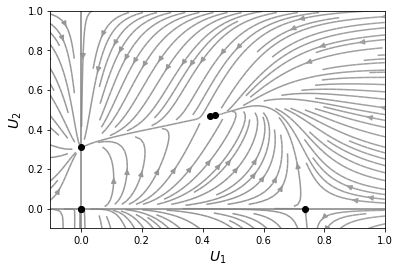

In [98]:
xlist = [i[0] for i in solucion if not (np.iscomplex(complex(i[0])))]
ylist = [i[1] for i in solucion if not(np.iscomplex(complex(i[1]))) ]


plt.axvline(0, c='grey')
plt.axhline(0, c='grey')
plt.plot(xlist,ylist,'ko')

y, x = np.mgrid[min(ylist)-1:max(ylist)+1:150j, min(xlist)-1:max(xlist)+1:150j]
eq1 = g*x*(1-q1*x+(p11*x+p12*y)*(1-x))
eq2 = g*y*(s-q2*y+(p21*x+p22*y)*(1-y))
plt.streamplot(x, y, eq1, eq2, color=eq1, cmap='Greys',linewidth=1.5,density = 4.0)
plt.xlim(-0.1, 1.0)
plt.ylim(-0.1, 1.0)
plt.xlabel(r'$U_{1}$',size = 14)
plt.ylabel(r'$U_{2}$',size= 14)


#plt.tight_layout()
#plt.savefig('figure5_1.eps',dpi= 1500)
#plt.savefig('figure5_1.pdf',dpi= 1500)
plt.savefig('figure5_1.jpg',dpi= 1500)
plt.show()